In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [22]:
def renameColumns(df):
    return [col.split('-', 1)[1] if '-' in col else col for col in df.columns]

def convertTime(df):
    if df["Time"].dtype == 'int64':
        df["Time"] = pd.to_datetime(df["Time"], unit='ms')    
    else:
        df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
    df.sort_values(by=['Time'], inplace=True)
    return df

In [23]:
def readAndProcessCSV(filename):
    df = pd.read_csv(filename)
    df.columns = renameColumns(df)
    df = convertTime(df)
    return df

In [24]:
def normalize_data(df, features_to_normalize):
    scaler = MinMaxScaler()
    df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
    return df

In [25]:
aggregated_df = pd.read_csv('dataAggregated_file.csv')
aggregated_df.head(10)

,eye02.occupancy,eye03.occupancy,eye04.occupancy,eye05.occupancy,eye09.occupancy,eye11.occupancy,eye.humidity.mean,eye.humidity.std,eye.humidity.median,eye.humidity.min,...,gas.co2.median,gas.co2.max,gas.co2.min,gas.co2.iqr,voc.tvoc.mean,voc.tvoc.std,voc.tvoc.median,voc.tvoc.max,voc.tvoc.min,voc.tvoc.iqr
0,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,455.5,569.0,400.0,105.25,118.2,58.22,109.0,203.0,65.0,80.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,453.5,578.0,398.0,99.25,120.2,59.81,117.0,203.0,59.0,84.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,460.5,569.0,391.0,79.00,118.0,65.55,109.0,206.0,51.0,98.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,454.0,565.0,410.0,84.25,119.4,59.85,113.0,209.0,66.0,77.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,445.0,575.0,401.0,84.25,120.0,64.33,106.0,217.0,63.0,82.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,442.5,546.0,407.0,85.00,110.0,62.56,108.0,199.0,43.0,78.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,475.5,554.0,398.0,64.25,117.4,65.65,111.0,215.0,55.0,82.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,464.0,568.0,421.0,64.75,114.4,56.19,111.0,196.0,53.0,64.0
8,0.0,0.0,0.0,0.0,1.0,0.0,1.75,1.75,1.75,1.75,...,468.5,541.0,401.0,63.50,115.2,61.10,112.0,205.0,55.0,76.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.75,1.75,1.75,1.75,...,462.0,544.0,397.0,65.25,120.4,59.96,108.0,213.0,68.0,71.0


In [26]:
# Assuming temperature columns start with 'eye', 'gas', and 'voc'
temperature_columns = [col for col in aggregated_df.columns if 'temperature' in col]


In [27]:
# Normalize the temperature data
aggregated_df = normalize_data(aggregated_df, aggregated_df.columns)

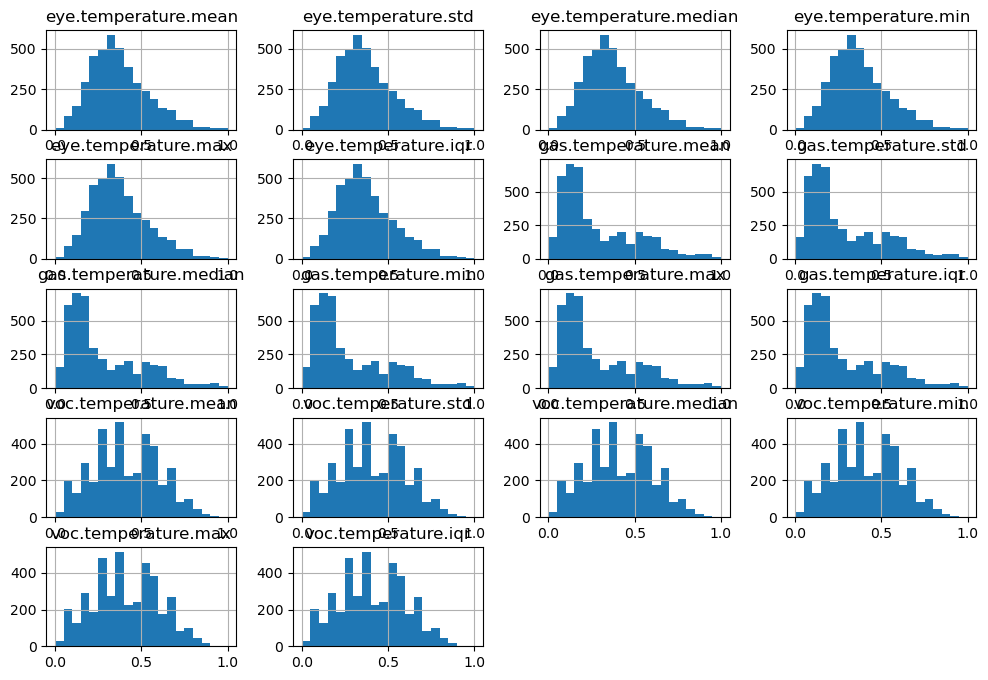

In [28]:
# Visualize the normalized temperature data (optional)
aggregated_df[temperature_columns].hist(bins=20, figsize=(12, 8))
plt.show()

In [29]:
# Save the normalized data to a new CSV file
aggregated_df.to_csv('dataNormalized_file.csv', index=False)